<a href="https://colab.research.google.com/github/Ranjani94/Deep_Learning/blob/master/Graded_Assignment_2/FastaiImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Creating our own dataset from Google images [Airplane,Rockets, bus, car, boat, bike, train] - 7 classes

In [0]:
#Any changes to the libraries are reloaded here automatically #Add these 3 lines in all the code
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.basics import *
from fastai.metrics import error_rate

In [40]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [41]:
# folder ='airplane'
path = Path('/content/gdrive/My Drive/Deep_Learning/DL_dataset')
# dest = path/folder
# dest.mkdir(parents=True, exist_ok=True)

data = (ImageList.from_folder(path) .random_split_by_pct() .label_from_folder() .transform(get_transforms(), size=224) .databunch())

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:217: UserWarning: `random_split_by_pct` is deprecated, please use `split_by_rand_pct`.
  warn("`random_split_by_pct` is deprecated, please use `split_by_rand_pct`.")


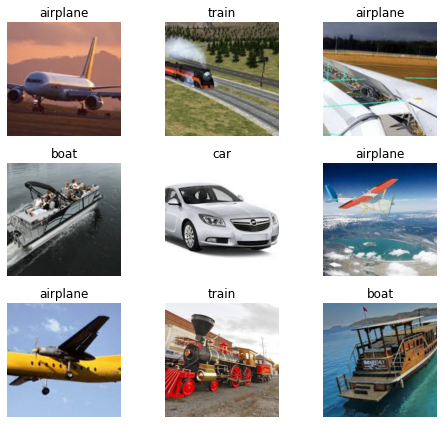

In [42]:
data.show_batch(rows=3, figsize=(7,6))

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [44]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [45]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,1.077882,0.177772,0.055804,00:22
1,0.613529,0.141802,0.040179,00:23


In [0]:
learn.save('stage-1')

In [47]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

In [48]:
data.classes

['airplane', 'bike', 'boat', 'bus', 'car', 'rocket', 'train']

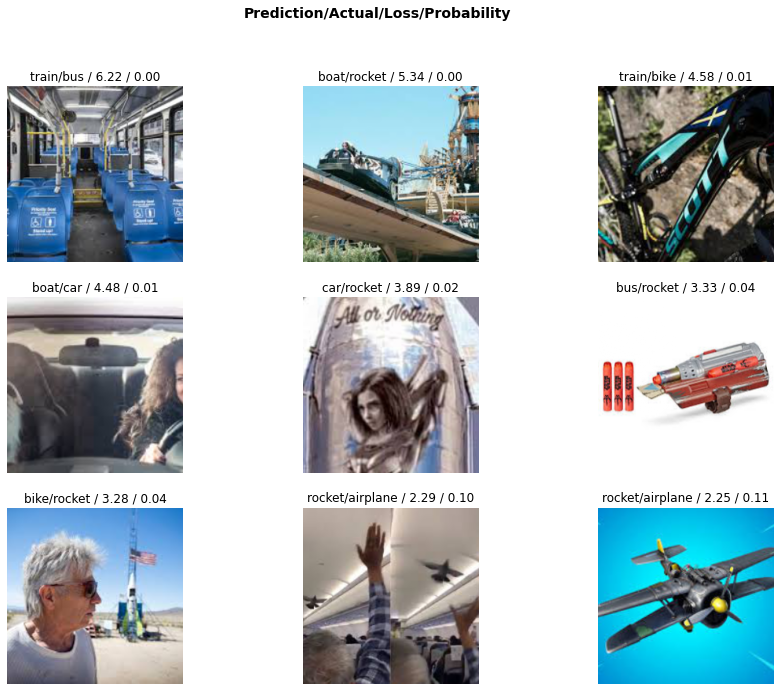

In [49]:
interp.plot_top_losses(9, figsize=(15,11))

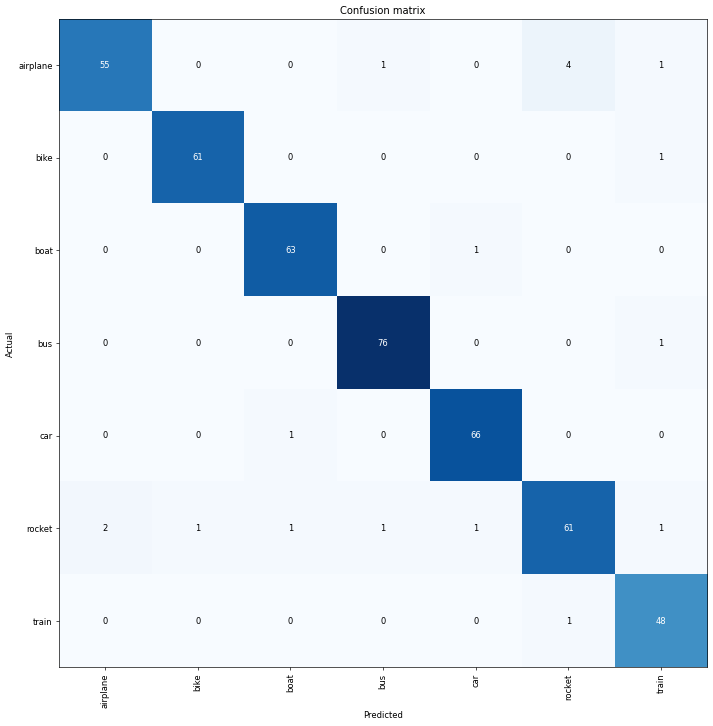

In [50]:

interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [51]:

interp.most_confused(min_val=2)

[('airplane', 'rocket', 4), ('rocket', 'airplane', 2)]

In [0]:
learn.unfreeze()

In [53]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.474015,0.352758,0.093750,00:23


In [0]:
learn.load('stage-1');

In [55]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


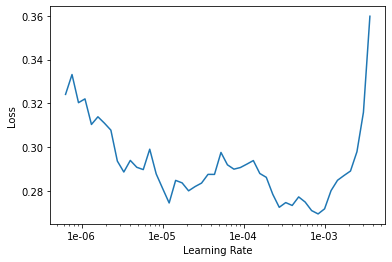

In [56]:
learn.recorder.plot()

In [57]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.353926,0.138107,0.042411,00:23
1,0.306544,0.126849,0.035714,00:23


In [0]:

learn = cnn_learner(data, models.resnet50, metrics=error_rate)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


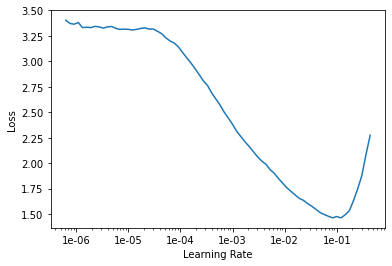

In [59]:

learn.lr_find()
learn.recorder.plot()

In [60]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,0.953626,0.189820,0.055804,00:24
1,0.581450,0.143332,0.035714,00:24
2,0.411277,0.149461,0.042411,00:24
3,0.338792,0.194726,0.042411,00:24
4,0.257688,0.149602,0.037946,00:24
5,0.199409,0.142271,0.035714,00:24
6,0.160792,0.123358,0.035714,00:24
7,0.134223,0.111331,0.035714,00:24
8,0.104465,0.115151,0.031250,00:24
9,0.095721,0.105620,0.029018,00:24


In [0]:
learn.save('stage-1-50')

In [62]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.087578,0.104173,0.031250,00:25
1,0.082324,0.102363,0.026786,00:25
2,0.067819,0.103808,0.029018,00:25


In [0]:
learn.load('stage-1-50');

In [64]:

interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

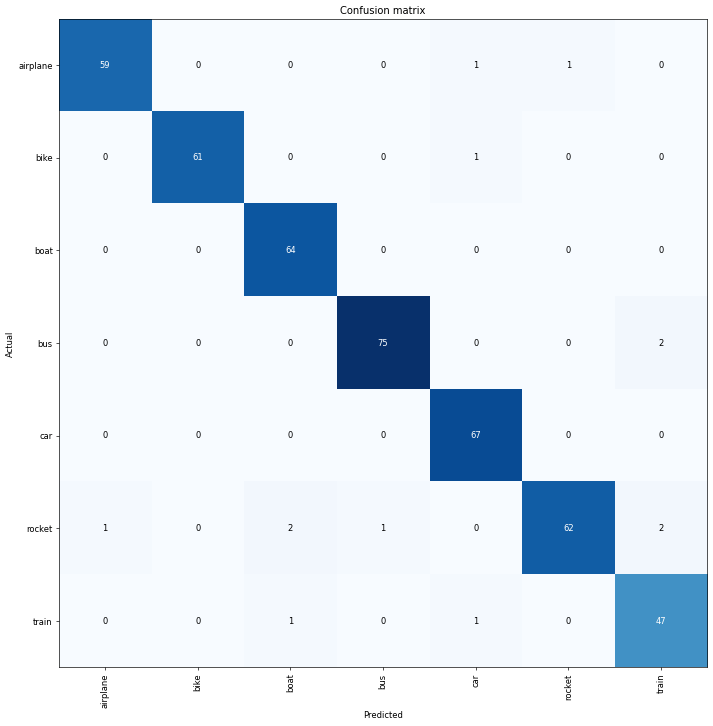

In [65]:

interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

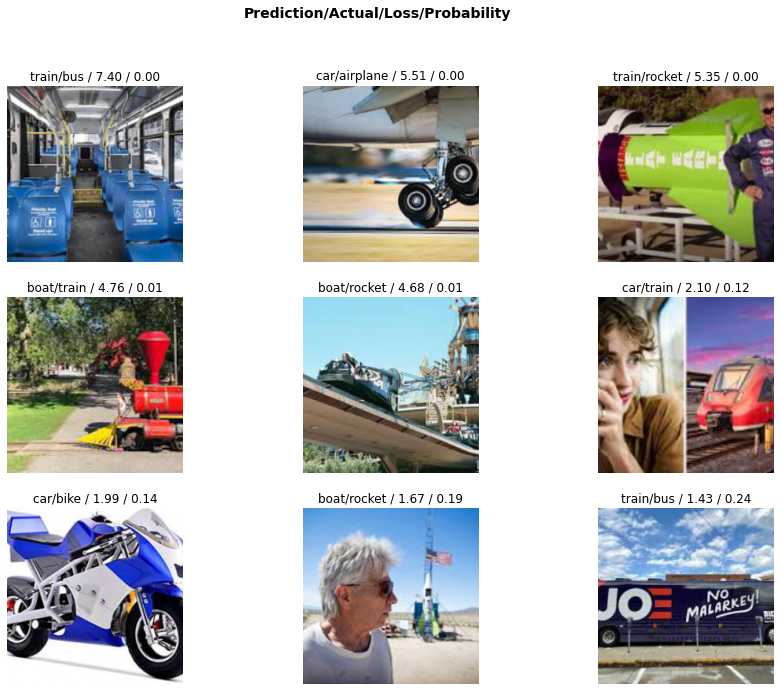

In [66]:
interp.plot_top_losses(9, figsize=(15,11))

In [0]:
learn.save('/content/gdrive/My Drive/Deep_Learning/DL_dataset/export.pkl')

In [0]:
learn.export()